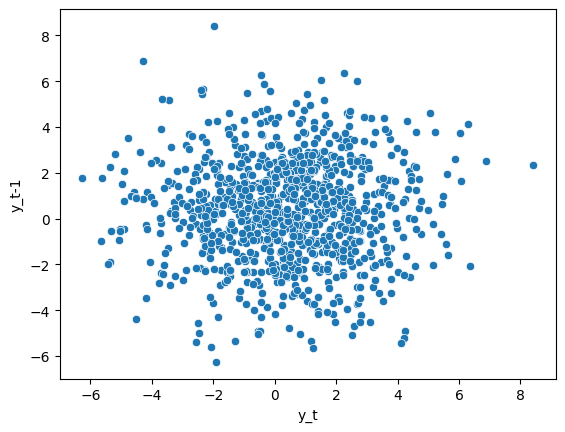

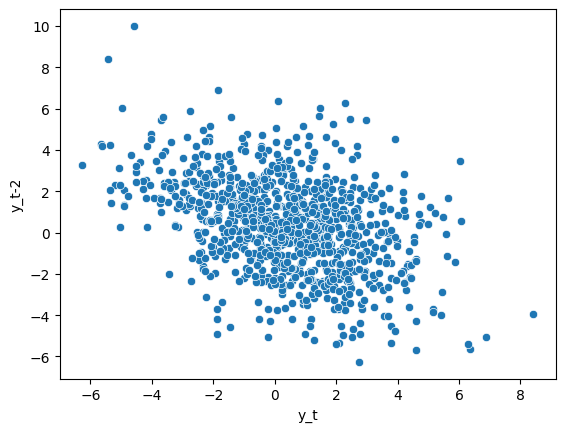

ADFuller p: 5.6625909227578684e-30


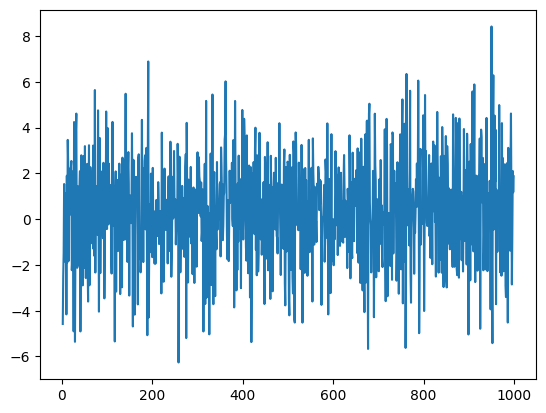

,y_t,y_t-1,y_t-2,naive_mean,arima_predict
995,-2.854424,0.538373,4.613807,0.368630,-1.337787
996,-0.702705,-2.854424,0.538373,0.367554,0.305377
997,2.101536,-0.702705,-2.854424,0.369293,1.673909
998,1.174293,2.101536,-0.702705,0.370100,0.804162
999,1.872418,1.174293,2.101536,0.370100,-0.330068


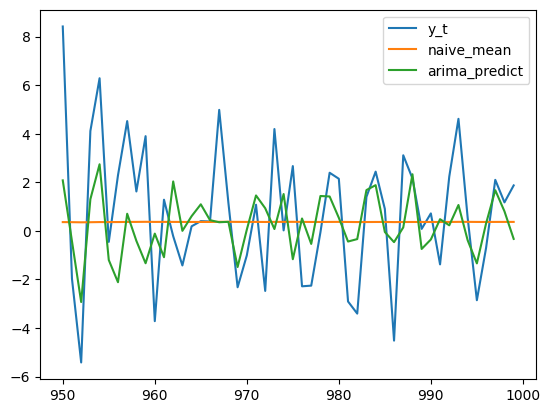

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

RANDOM_STATE = 17
SAMPLE_SIZE = 1000
FORECAST_LAST = 50

def get_rng(seed=RANDOM_STATE):
    return np.random.default_rng(seed=seed)

def AR(y_t1, y_t2, w1, w2, b, e):
    return w1*y_t1 + w2*y_t2 + b + e

err = get_rng().normal(loc=0, scale=2, size=SAMPLE_SIZE)
for w1, w2, b, e in [[0, -0.4, 0.5, err],]:
    y = []
    for i in range(SAMPLE_SIZE):
        if i == 0:
            y_ = 10
        else:
            y_t1 = y[i-1]
            y_t2 = 0 if i < 2 else y[i-2]
            y_ = AR(y_t1, y_t2, w1, w2, b, e[i])
        y.append(y_)

    df = pd.DataFrame(y, columns=['y_t'])
    df['y_t-1'] = df['y_t'].shift(1)
    df['y_t-2'] = df['y_t'].shift(2)
    df.drop(index=[0, 1], inplace=True)
    sns.scatterplot(data=df, x='y_t', y='y_t-1')
    plt.show()
    sns.scatterplot(data=df, x='y_t', y='y_t-2')
    plt.show()
    adf_p = adfuller(df['y_t'])[1]
    print(f'ADFuller p: {adf_p}')
    df['y_t'].plot()
    plt.show()
    
    df[['naive_mean', 'arima_predict']] = np.NaN
    forecast_start = df.shape[0]-FORECAST_LAST
    for i in range(forecast_start, df.shape[0]):
        idx = df.iloc[i].name
        #df['naive_mean'].iloc[i] = df['y_t-1'].iloc[:i+1].mean()
        df['naive_mean'].loc[idx] = df['y_t-1'].loc[0:idx+1].mean()

        mdl = ARIMA(endog=df[['y_t-1']].iloc[:i+1], order=(2, 0, 0)).fit()
        df['arima_predict'].iloc[i] = mdl.forecast(steps=1)
        
df_predictions = df.iloc[forecast_start:].copy()

display(df_predictions.tail(5))

df_predictions.drop(labels=['y_t-1', 'y_t-2'], axis=1, inplace=True)
df_predictions.plot()
plt.show()

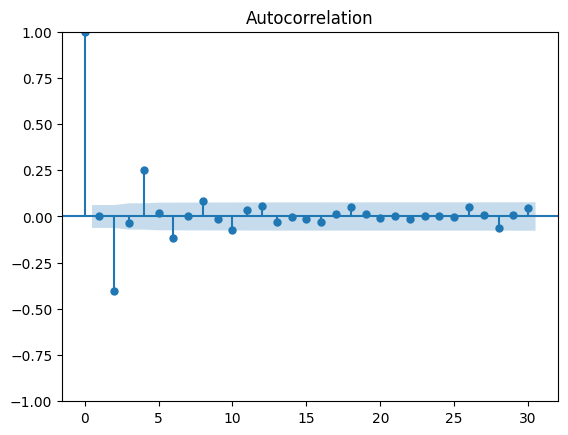

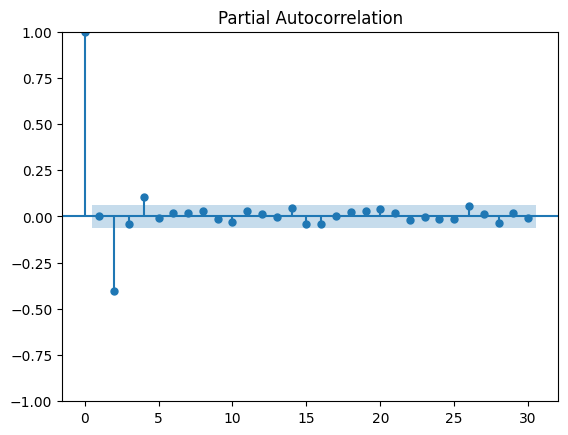

In [2]:
plot_acf(df[['y_t']])
plt.show()
plot_pacf(df[['y_t']], method='ywm')
plt.show()